#  <span style="color:red"> <p style="text-align:center"> Handwritten Digits </p></span>


Made By  : **Archita Agrawal**

- **Team ID:**    PTID-CDS-SEP-22-1372
- **Project Id:** PRCP_1002_Handwritten_Digits

# Overview

Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of handwritten digits. 


## **Business Case** : 

### To classify Handwriiten Digit using CNN and various classifier model

Using Machine Learning and various data science libraries we build a model that classify the data points into given labels. We will use the following pipeline to create a reliable model:

- Problem Definition
- Data 
- Explorartory Data Analysis
- Data Preprocessing
- Feature Selection
- Model Selection
- HyperParameter Tunning
- Model Evaluation
- Feature Importance

## Problem Definition

Goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

## Problem Statement
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

Task3:- Compare between various models and find the classifier that works better.


## Data

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.
Your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

The Data provided by Datamites:

https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1002-HandwrittenDigits.zip

Using Both Testing and Training data.


## Attribute Information

- The input feature contains images. <br>
- Output feature contains 10 classes (digits varying from 0 to 9)


### Setting Up the tools

In [1]:
# to install tensorflow
#! pip install tensorflow

# All the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime as dt
tf.get_logger().setLevel('ERROR')
from scipy import stats

%matplotlib inline 

# Get rid of all the warnings
import warnings 
warnings.filterwarnings('ignore')

# Model from TensorFlow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Activation,Flatten,Conv2D,MaxPooling2D,InputLayer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,f1_score

# Models from Scikit-Learn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

### Loading- "MNIST Data Set"

 Containing Training samples=60,000, Testing Samples =10,000

TensorFlow already contain MNIST data which can be loaded using Keras

In [2]:
## This is bascially handwritten characters based on 28*28 sized images of 0 to 9
mnist=tf.keras.datasets.mnist

### After Loading the MNIST data,Divide into train and Test datasets

In [3]:
## Unpacking the dataset into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

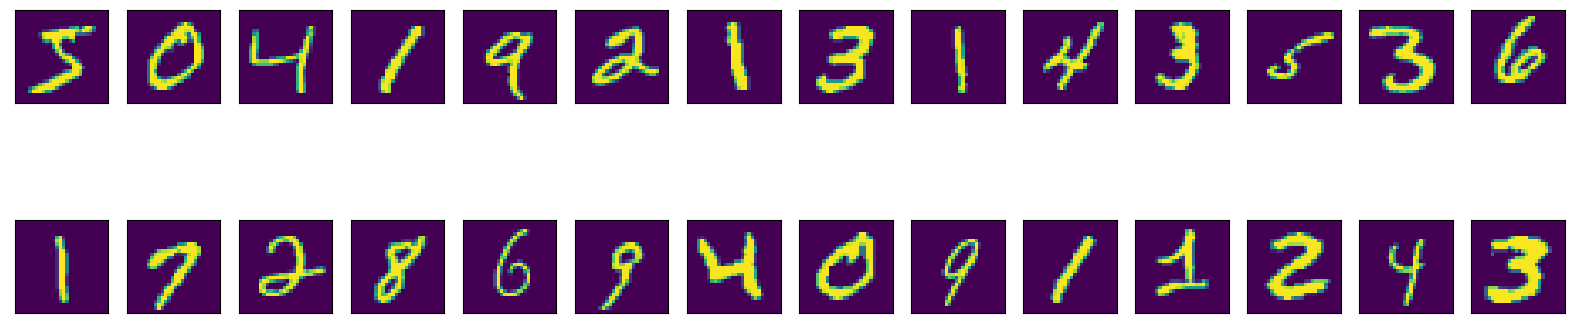

In [4]:
## Retriving data
fig = plt.figure(figsize=(20,5))
for i in range(28):
    ax = fig.add_subplot(2, 14, i + 1, xticks=[], yticks=[])
    ax.imshow((x_train[i]))

<h4 style=color:green>Data retrived as its showing 28 hand written digits which lies in between from 0 to 9.</h3>

### Basic Checks

In [5]:
# Checking shape of x_train
x_train.shape

(60000, 28, 28)

In [6]:
# Checking shape of x_test
x_test.shape

(10000, 28, 28)

In [7]:
# Checking shape of y_train
y_train.shape

(60000,)

In [8]:
# Checking shape of y_test
y_test.shape

(10000,)

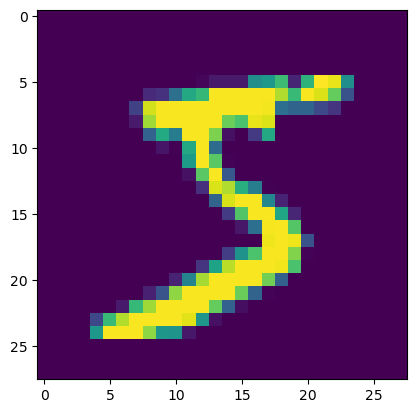

In [9]:
#Just checking how data looks like 
plt.imshow(x_train[0])
plt.show()

<h4 style=color:green>its Showing in color formart but we dont know its really a color image or not.</h4>

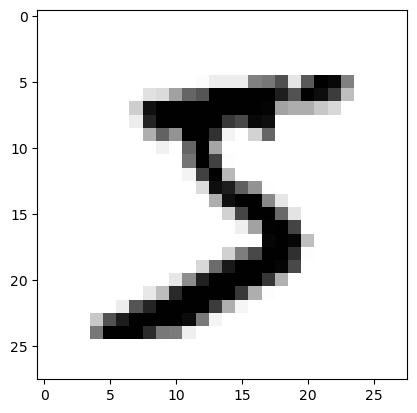

In [10]:
# However we dont know its color image or binary image so in order to plot it we will chnage the congifuration
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

### Checking the value of each pixel before doing Normalization

In [11]:
# printing the value of each pixel before normalization
print(x_train[0]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

<h4 style=color:green>Its Showing clearly that images are grey scale (0 to 255) not colored (RGB).</h3>

### <span style="color:Green">Observation from Basic Checks : </span>

- We have 60000 Training samples.
- We have 10000 Testing samples.
- Images is of 28*28 size.
- Images are greyscaled not colored.

### Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.


In [12]:
# creating 10 classes to store 
class_0=[]
class_1=[]
class_2=[]
class_3=[]
class_4=[]
class_5=[]
class_6=[]
class_7=[]
class_8=[]
class_9=[]
for i in range(0,27):
    if (y_train[i])==0:
        class_0.append(i)
    elif (y_train[i])==1:
        class_1.append(i)
    elif (y_train[i])==2:
        class_2.append(i)
    elif (y_train[i])==3:
        class_3.append(i)
    elif (y_train[i])==4:
        class_4.append(i)
    elif (y_train[i])==5:
        class_5.append(i) 
    elif (y_train[i])==6:
        class_6.append(i)
    elif (y_train[i])==7:
        class_7.append(i)
    elif (y_train[i])==8:
        class_8.append(i)
    elif (y_train[i])==9:
        class_9.append(i)


print("Index value where 0 number present : ",class_0) 
print("Index value where 1 number present : ",class_1)
print("Index value where 2 number present : ",class_2)
print("Index value where 3 number present : ",class_3)
print("Index value where 4 number present : ",class_4)
print("Index value where 5 number present : ",class_5)
print("Index value where 6 number present : ",class_6)
print("Index value where 7 number present : ",class_7)
print("Index value where 8 number present : ",class_8)
print("Index value where 9 number present : ",class_9)

Index value where 0 number present :  [1, 21]
Index value where 1 number present :  [3, 6, 8, 14, 23, 24]
Index value where 2 number present :  [5, 16, 25]
Index value where 3 number present :  [7, 10, 12]
Index value where 4 number present :  [2, 9, 20, 26]
Index value where 5 number present :  [0, 11]
Index value where 6 number present :  [13, 18]
Index value where 7 number present :  [15]
Index value where 8 number present :  [17]
Index value where 9 number present :  [4, 19, 22]


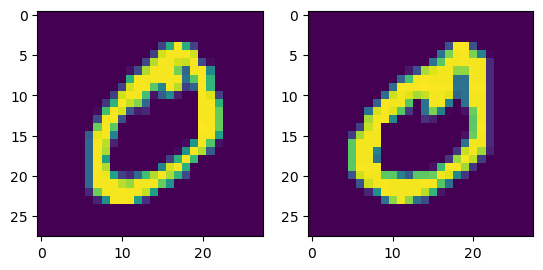

In [13]:
# Printing the images of class 0 
class_t=class_0
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

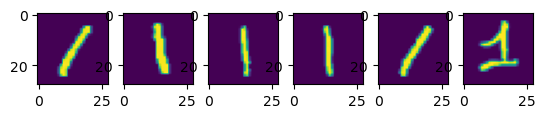

In [14]:
# Printing the images of class 1
class_t=class_1
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

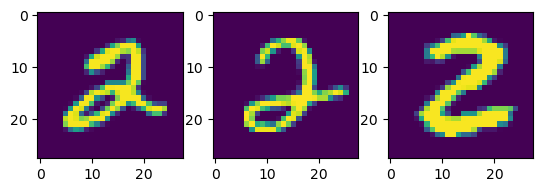

In [15]:
# Printing the images of class 2 
class_t=class_2
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

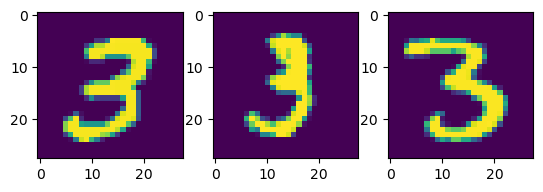

In [16]:
# Printing the images of class 3 
class_t=class_3
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

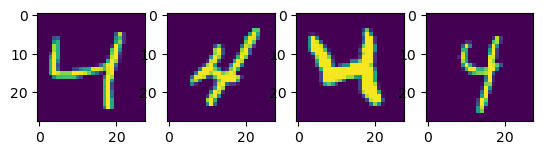

In [17]:
# Printing the images of class 4 
class_t=class_4
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

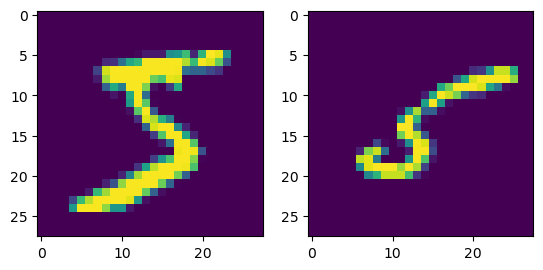

In [18]:
# Printing the images of class 5 
class_t=class_5
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

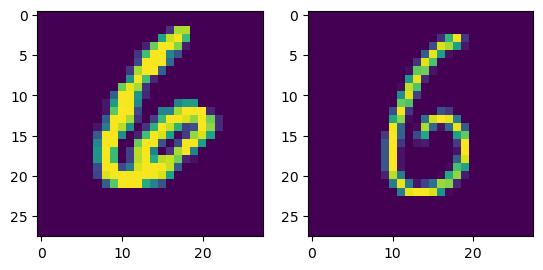

In [19]:
# Printing the images of class 6 
class_t=class_6
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

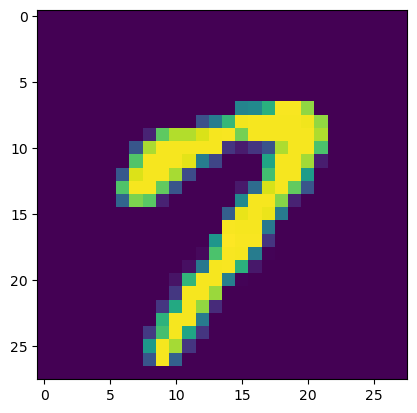

In [20]:
# Printing the images of class 7 
class_t=class_7
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

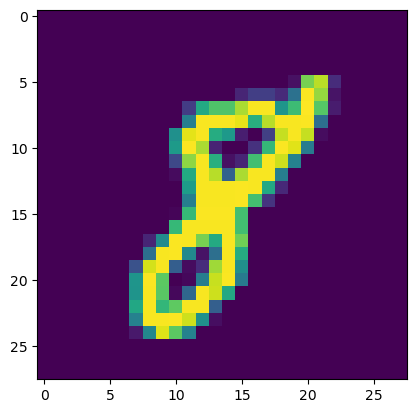

In [21]:
# Printing the images of class 8 
class_t=class_8
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

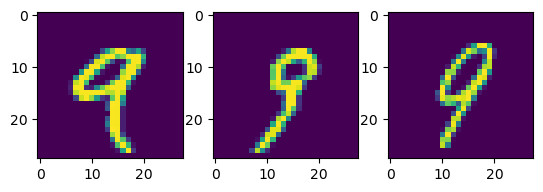

In [22]:
# Printing the images of class 9 
class_t=class_9
for j in range(len(class_t)):
    plt.subplot(1,len(class_t),j+1)
    plt.imshow(x_train[class_t[j]])

## Explorartory Data Analysis

### Identifying class Imbalance

Text(0, 0.5, 'Number of images')

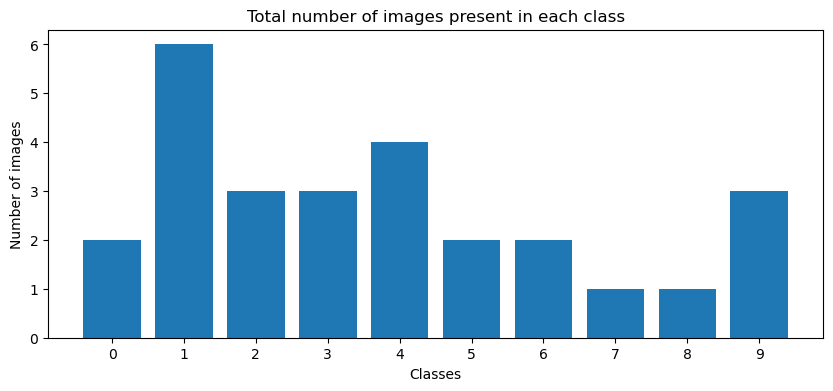

In [23]:
# Plotting total number of images present in each class
x_axis = [len(class_0),len(class_1),len(class_2),len(class_3),len(class_4),len(class_5),len(class_6),len(class_7),len(class_8),len(class_9)]
handwritten_digit_class = ['0','1','2','3','4','5','6','7','8','9']
plt.rcParams["figure.figsize"] =(10,4)
plot=plt.bar(handwritten_digit_class,x_axis)
plt.title("Total number of images present in each class")
plt.xlabel("Classes")
plt.ylabel("Number of images")

<h4 style=color:green>Above graph observation :</h4>

- As it is multiclass classification and very small set of data ,data is highly imbalanced but we can not balance the data.

### Starting with Model 

## <p style="text-align:center"> 1. Multilayer Perceptron (MLP) </p>

### Preparing data before building the model

In [24]:
# reshape data for an MLP input
x_train1 = np.reshape(x_train, (-1, 784))
x_test1 = np.reshape(x_test, (-1, 784))

# normalize data
x_train1 = x_train1.astype('float32') / 255
x_test1 = x_test1.astype('float32') / 255

# convert labels to a one-hot vector
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

### Define neural network architecture

In [25]:
# define network architecture
MLP = Sequential()

MLP.add(InputLayer(input_shape=(784, ))) # input layer
MLP.add(Dense(256, activation='relu')) # hidden layer 1
MLP.add(Dense(256, activation='relu')) # hidden layer 2
MLP.add(Dense(10, activation='softmax')) # output layer

# summary
MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


### <span style="color:Green">Observation: </span>

- The number of trainable parameters is 269,322. i.e optimal value for the parameter.
- From input layer to the first hidden layer: 784 x 256 + 256 = 200,960
- From the first hidden layer to the second hidden layer: 256 x 256 + 256 = 65,792
- From the second hidden layer to the output layer: 10 x 256 + 10 = 2570
- Total tranable parameters: 200,960 + 65,792 + 2570 = 269,322.
- So,The total number of trainable parameters is equal to the number of total elements in weight matrices and bias vectors.
- No,activation function is needed for input layer.
- We need to use a non-linear activation function in the hidden layers. This is because handwritten digits classification is a non-linear task. Without a non-linear activation function in the hidden layers, our MLP model will not learn any non-linear relationship in the data. Therefore, we use the ReLU activation function in both hidden layers. ReLU is a non-linear activation function.
- In the output layer, we use the Softmax activation function. It is the only option for a multiclass classification problem. The output layer has 10 nodes that correspond to the 10 labels (classes).

### Optimization


In [26]:
# optimization
MLP.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

### Train (fit) the model


In [27]:
# train (fit)
history=MLP.fit(x_train1,y_train1,
        epochs=20, batch_size=128,validation_split=0.15)

Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.2861 - accuracy: 0.9182 - val_loss: 0.1220 - val_accuracy: 0.9638
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.1073 - accuracy: 0.9683 - val_loss: 0.0883 - val_accuracy: 0.9734
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9789 - val_loss: 0.0779 - val_accuracy: 0.9770
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0705 - val_accuracy: 0.9790
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0794 - val_accuracy: 0.9772
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0883 - val_accuracy: 0.9749
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.1009 - val_accuracy: 0.9724
Epoch 

### Evaluate model performance

In [28]:
# evaluate performance
test_loss, test_acc = MLP.evaluate(x_test1, y_test1,
                                   batch_size=128,
                                   verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.10303068906068802
Test accuracy: 0.9811000227928162


<h4 style=color:green> Got test Accuracy 98.10% and Test Loss 09.83% approx </h4>

### Making a prediction

In [29]:
# get predictions on the test set
y_hat = MLP.predict(x_test1)
y_hat_label = [np.argmax(i) for i in y_hat]

313/313 [==============================] - 0s 902us/step


### Classification Report

In [30]:
# Classification report and confusion matrics
print(classification_report(y_test,y_hat_label))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Confusion Matrix

<AxesSubplot:>

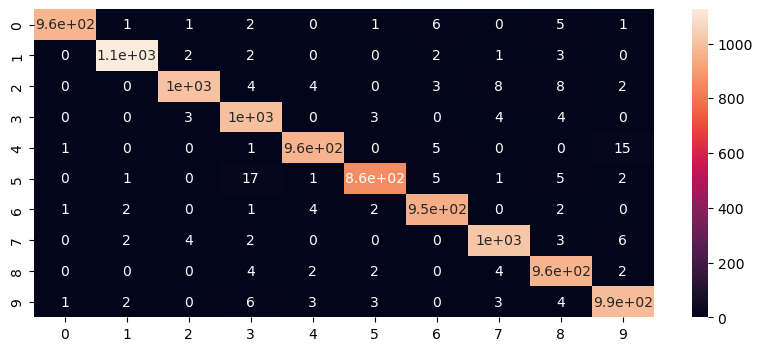

In [31]:
# Displaying Confusion Matrix using HeatMap
cf_matrix = confusion_matrix(y_test,y_hat_label)
sns.heatmap(cf_matrix, annot=True)


### Plotting Training and Validation accuracy

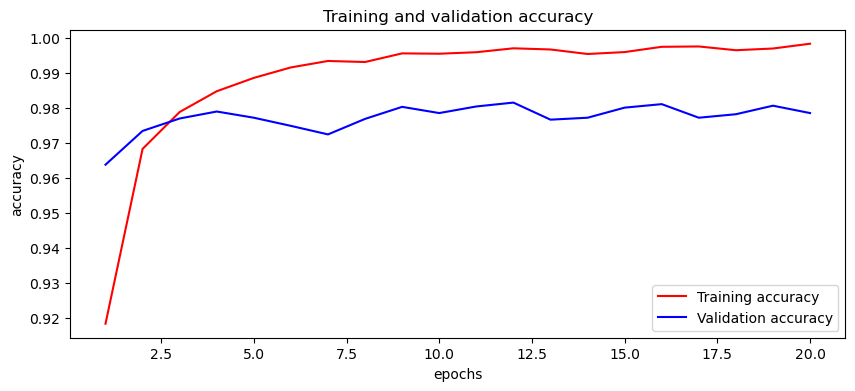

In [32]:
# Plotting the training accuracy and validation accuracy
accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Plotting Traning and Validation loss

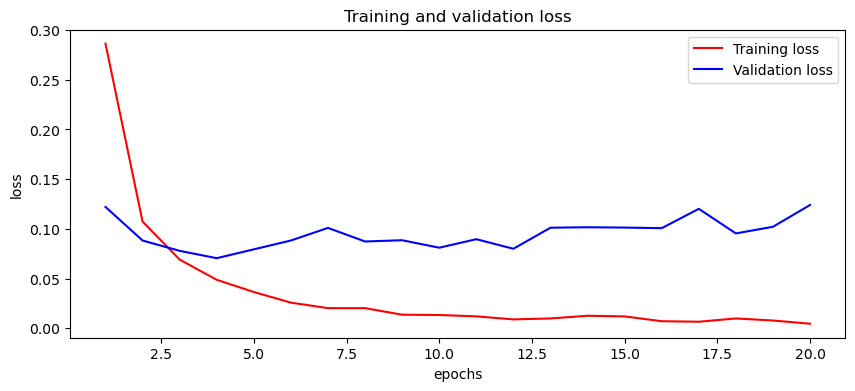

In [33]:
# Plotting the traning loss and validation loss
loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

<h4 style=color:green>* This data overfitting is the problem here..When we look into accuracy graph it is clear that to a certain percentage accuracy of training data and validation accuracy is increasing after that validation accuracy is decreasing</h4>

### <span style="color:green">Obervation Of MLP:</span>
<h4>We obtained a higher accuracy score for our base MLP model. However, our MLP model is not parameter efficient. Even for this small classification task, it requires 269,322 trainable parameters for just 2 hidden layers with 256 units for each.</h4>

## Now Using PCA ,we will  reduce the number of trainable parameters without changing the architecture of the MLP model and without reducing the model accuracy!

### Apply PCA to the MNIST data

Text(0, 0.5, 'Explained variance')

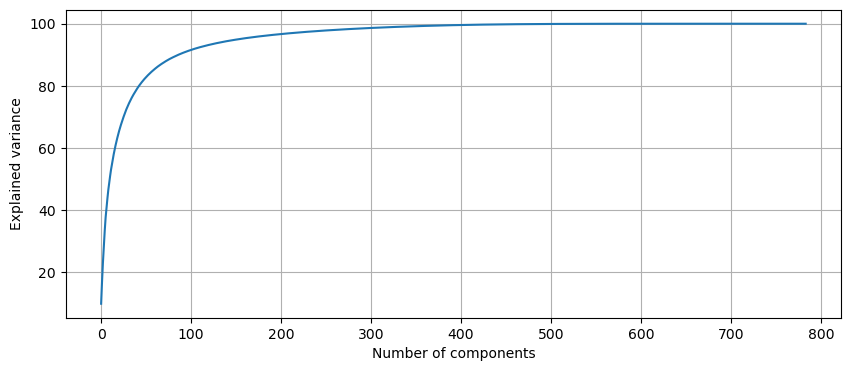

In [34]:
# reshape (flatten) data before PCA

x_train2 = np.reshape(x_train, (-1, 784))
x_test2 = np.reshape(x_test, (-1, 784))

# normalize data before PCA
x_train2 = x_train2.astype('float32') / 255
x_test2 = x_test2.astype('float32') / 255

# apply PCA once to
# select the best number of components

pca_784 = PCA(n_components=784)
pca_784.fit(x_train2)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [35]:
print(x_train2.shape)

(60000, 784)


<h4 style=color:green> We can see that the first 100 components capture about 90% of the variability in the original image data. That is enough to retain the quality of the original images. So, we select the first 100 components and apply PCA again with that number of selected components. </h4>

In [36]:
# apply PCA again with 100 components
# about 90% of the variability retained
# transformation is applied to both
# train and test sets
pca_100 = PCA(n_components=100)
pca_100.fit(x_train2)
x_train2_reduced = pca_100.transform(x_train2)
x_test2_reduced = pca_100.transform(x_test2)

# verify shape after PCA
print("Train images shape:", x_train2_reduced.shape)
print("Test images shape: ", x_test2_reduced.shape)

# get exact variability retained
print("\nVar retained (%):", 
      np.sum(pca_100.explained_variance_ratio_ * 100))

Train images shape: (60000, 100)
Test images shape:  (10000, 100)

Var retained (%): 91.43128


<h4 style=color:green> We have reduced the dimensionality of the original image data by 7.84x times (784/100) while keeping 91.43% variability in the original data.</h4>

### Build the MLP classifier with compressed (reduced) image data

In [37]:
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

# define network architecture

MLP1 = Sequential()
MLP1.add(InputLayer(input_shape=(100, ))) # input layer
MLP1.add(Dense(64, activation='relu')) # hidden layer 1
MLP1.add(Dense(32, activation='relu')) # hidden layer 2
MLP1.add(Dense(10, activation='softmax')) # output layer

# optimization
MLP1.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# train (fit)
history1 = MLP1.fit(x_train2_reduced, y_train2, 
                  epochs=20, batch_size=128, verbose=0,
                  validation_split=0.15)

# evaluate performance on test data
test_loss1, test_acc1 = MLP1.evaluate(x_test2_reduced, y_test2,
                                         batch_size=128,
                                         verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.10303068906068802
Test accuracy: 0.9811000227928162


<h4 style=color:green>This time we get an accuracy score of 0.97. Previously (i.e. before applying PCA), we got an accuracy score of 0.98. We only lose a very small amount of accuracy score. That is 0.10.</h4>



In [38]:
# Checking total number of parameter we get
MLP1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                6464      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 8,874
Trainable params: 8,874
Non-trainable params: 0
_________________________________________________________________


<h4 style=color:green>Previously (i.e. before applying PCA), we got 269,322 total parameters. This time we only got 8,874 total parameters. So, we’ve reduced the number of total parameters by 30x times (269,322 / 8,874) after applying PCA! We only lost 0.10 model accuracy.</h4>

### Making a Prediction



In [39]:
# get predictions on the test set
y_hat1=MLP1.predict(x_test2_reduced)
y_hat_label1 = [np.argmax(i) for i in y_hat1]

313/313 [==============================] - 0s 602us/step


### Classification Report

In [40]:
# Classification report and confusion matrics
print(classification_report(y_test,y_hat_label1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Confusion Matrix

<AxesSubplot:>

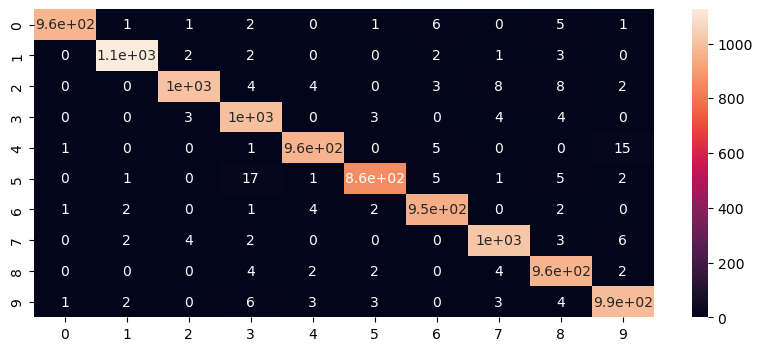

In [41]:
# Displaying Confusion Matrix using HeatMap
cf_matrix1 = confusion_matrix(y_test,y_hat_label1)
sns.heatmap(cf_matrix, annot=True)

### Plotting Training and Validation accuracy

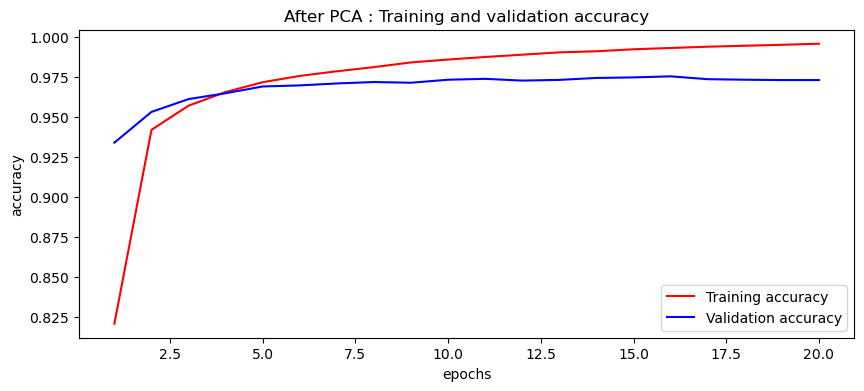

In [42]:
# Plotting the training accuracy and validation accuracy
accuracy1 = history1.history["accuracy"]
validation_accuracy1 = history1.history["val_accuracy"]
loss1 = history1.history["loss"]
epochs1 = range(1, len(loss1) + 1)
plt.plot(epochs1, accuracy1, "r", label="Training accuracy")
plt.plot(epochs1, validation_accuracy1, "b", label="Validation accuracy")
plt.title("After PCA : Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Plotting Training and Validation Loss

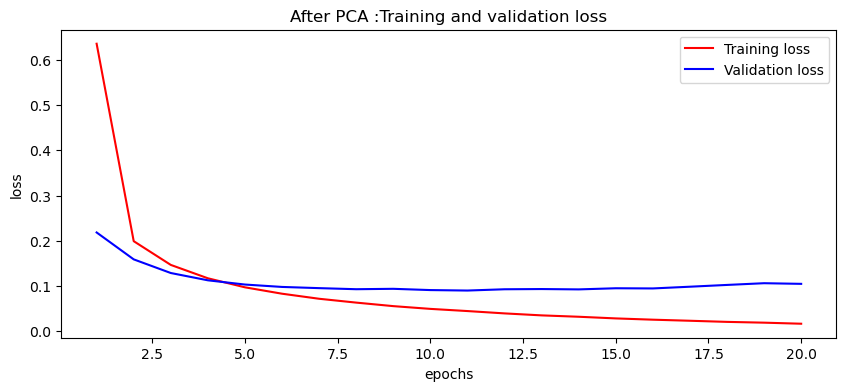

In [43]:
# Plotting the training loss and validation loss
loss1 = history1.history["loss"]
validation_loss1 = history1.history["val_loss"]
plt.figure()
plt.plot(epochs1, loss1, "r", label="Training loss")
plt.plot(epochs1, validation_loss1, "b", label="Validation loss")
plt.title("After PCA :Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

<h4 style='color:green'>It is clearly seen that model is less overfitting

### <span style="color:green">Overall Observation of MLP Model before and after applying PCA :</span>


- We applied PCA to the MNIST data and successfully reduced the dimensionality of the original image data by 7.84x times. So, we could significantly reduce the size of the MLP input layer. We kept 91.42% variability in the original data. So, images are still identifiable.

- We only lost a very small amount of accuracy after applying PCA.

- We could reduce the number of total parameters in our MLP model by 30x times! This is because we significantly reduced the size of the MLP input layer and the number of neurons in the hidden layers. Because the input size is small now, we have the opportunity to decrease the number of neurons in the hidden layers. You will not get much performance improvement by increasing the number of neurons in the hidden layers. However, it is better to do some experiments by setting different values and then measuring the performance.

- After applying PCA, the model is less overfitting.

- It is easy to apply PCA for MNIST image data because the images are grayscale which are represented as two-dimensional (2D) tensors. 

## <p style="text-align:center"> 2.  Conventional Neural Network </p>

### Pre-Processing Step / Normalizing the data

Its a grey scaled image and all varies from 0 to 255 


In [44]:
# Normalizing the data
x_train3=tf.keras.utils.normalize(x_train,axis=1)
x_test3=tf.keras.utils.normalize(x_test,axis=1)

In [45]:
# Printing the shape of x_train and y_train
print(x_train3.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


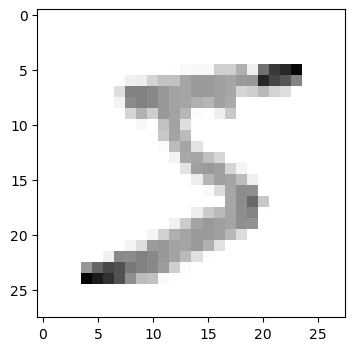

In [46]:
#checking the normalize data by printing 1st image
plt.imshow(x_train3[0],cmap=plt.cm.binary)

In [47]:
# After Normalization checking the value of an image
print(x_train3[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

<h4 style=color:green>Normalization done of all the value as you can see in above value its now range from 0 to 1.</h4>

### Resizing the image to make it suitable for Conventional operation

In [48]:
# Specifying image sixe as 28 pixel
img_size=28

# Increasing one dimension for kernel operation of x_train
x_train3r=np.array(x_train3).reshape(-1,img_size,img_size,1) 

# Increasing one dimension for for kernel operation x_test
x_test3r=np.array(x_test3).reshape(-1,img_size,img_size,1)

# Printing the dimension of training samples 
print("Dimension of Training Samples",x_train3r.shape)

# Printing the dimension of testing samples
print("Dimension of Testing Samples",x_test3r.shape)


Dimension of Training Samples (60000, 28, 28, 1)
Dimension of Testing Samples (10000, 28, 28, 1)


<h4 style=color:green>Re-sized the image or increases the dimension of the image by 1 for both training and testing samples.</h4>

### Creating A Deep Conventional Neural Network Architecture

In [49]:
# Define Network Architecture
cnn_model=Sequential()

### Adding 1st Convolution Layer 0 1 2 3 (60000,28,28,1) 28-3+1=26 

#Only for first layer adding input shape
cnn_model.add(Conv2D(64,(3,3),input_shape=x_train3r.shape[1:]))
#Activation function to make it non-linear, <0, remove, >0
cnn_model.add(Activation("relu"))
#Maxpooling single maximum value of 2*2,
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

### Adding 2nd Convolution Layer 26-3+1=24*24

cnn_model.add(Conv2D(64,(3,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

### Adding 3rd Convolution Layer
cnn_model.add(Conv2D(64,(3,3))) # 24*24
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

### Fully Connected Layer #1 20*20=400

#Before using fully connected layer need to be flatten so that 2D to 1D
cnn_model.add(Flatten())
cnn_model.add(Dense(64))
cnn_model.add(Activation("relu"))

### Fully Connected Layer #2
cnn_model.add(Dense(32))
cnn_model.add(Activation("relu"))

### Last Fully Connected Layer,output must be equal to number of classes, 10 (0-9)
cnn_model.add(Dense(10))
cnn_model.add(Activation('softmax'))

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

### Optimization

In [50]:
# Compile the model
cnn_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

### Train the CNN_Model

In [51]:
# Training the model
history_cnn_model=cnn_model.fit(x_train3r,y_train,epochs=30,batch_size=86,validation_split=0.3)

Epoch 1/30
489/489 [==============================] - 29s 58ms/step - loss: 0.4596 - accuracy: 0.8540 - val_loss: 0.1507 - val_accuracy: 0.9542
Epoch 2/30
489/489 [==============================] - 31s 64ms/step - loss: 0.1311 - accuracy: 0.9603 - val_loss: 0.1030 - val_accuracy: 0.9680
Epoch 3/30
489/489 [==============================] - 38s 78ms/step - loss: 0.0914 - accuracy: 0.9723 - val_loss: 0.0824 - val_accuracy: 0.9734
Epoch 4/30
489/489 [==============================] - 34s 69ms/step - loss: 0.0718 - accuracy: 0.9782 - val_loss: 0.1010 - val_accuracy: 0.9695
Epoch 5/30
489/489 [==============================] - 34s 69ms/step - loss: 0.0610 - accuracy: 0.9806 - val_loss: 0.1072 - val_accuracy: 0.9649
Epoch 6/30
489/489 [==============================] - 33s 68ms/step - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.0683 - val_accuracy: 0.9789
Epoch 7/30
489/489 [==============================] - 33s 67ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0663 - val_accuracy:

### Evaluate Model Performance

In [52]:
# Model Evaluation
test_loss,test_acc3=cnn_model.evaluate(x_test3r,y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0829 - accuracy: 0.9851
Test loss: 0.08292612433433533
Test accuracy: 0.9811000227928162


<h4 style='color:green'> Got Accuracy score 0.98 and Loss Score 0.075</h4>

### Making Prediction

In [53]:
# Predicting CNN model
y_pred = cnn_model.predict(x_test3r)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[4.6088978e-08, 1.3377759e-06, 2.6358398e-09, 1.1170448e-10,
        1.1918644e-11, 8.6280783e-12, 4.7501181e-14, 9.9999869e-01,
        6.3349443e-12, 1.1278719e-09],
       [1.0994837e-06, 2.4580604e-12, 9.9999893e-01, 1.0167286e-09,
        6.9676104e-10, 2.8738442e-17, 1.3320910e-11, 2.1336018e-11,
        1.2315382e-08, 6.2244166e-13],
       [6.0387810e-12, 1.0000000e+00, 6.5316893e-14, 1.8124956e-13,
        4.0256620e-10, 1.9680564e-10, 4.8540794e-10, 1.5280542e-09,
        5.5818661e-10, 7.7054328e-11],
       [1.0000000e+00, 8.1615707e-17, 1.9212128e-10, 9.7184800e-14,
        2.4269378e-09, 2.5020227e-14, 3.5613676e-09, 3.9525878e-15,
        1.3526950e-12, 3.9689785e-09],
       [9.9212127e-20, 6.5386502e-16, 1.2968903e-12, 1.6917322e-15,
        1.0000000e+00, 5.8766848e-14, 2.6914430e-16, 3.8002948e-16,
        7.9016307e-13, 2.2951433e-15]], dtype=float32)

In [54]:
# Printing argmax of y_pred 
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:27]

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7]

### Classification Report

In [55]:
# Classification report
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

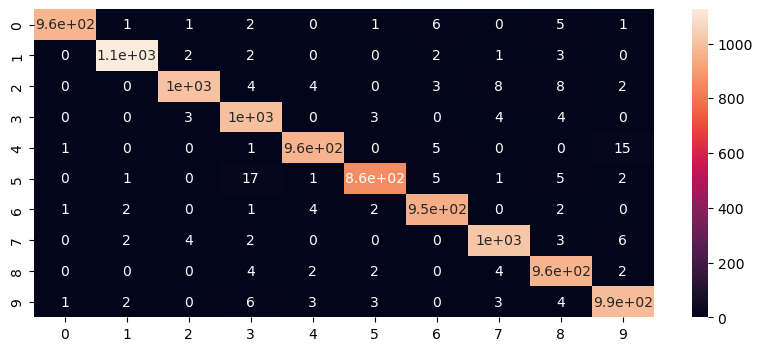

In [56]:
# Displaying Confusion Matrix using HeatMap
cf_matrix1 = confusion_matrix(y_test,y_classes)
sns.heatmap(cf_matrix, annot=True)

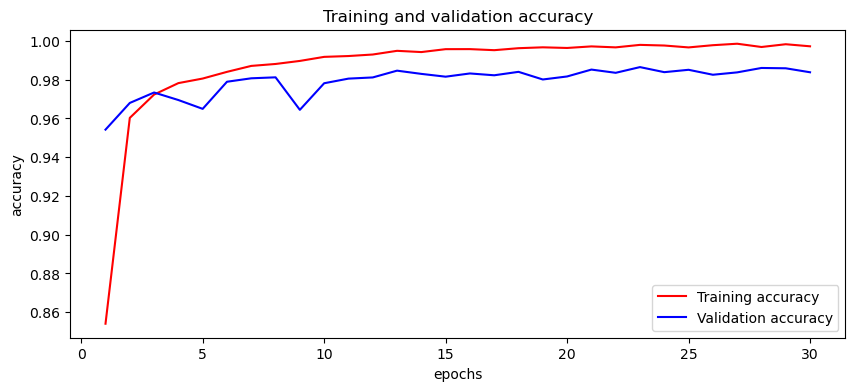

In [57]:
# Plotting the training accuracy and validation accuracy
accuracy3 = history_cnn_model.history["accuracy"]
validation_accuracy3 = history_cnn_model.history["val_accuracy"]
loss3 = history_cnn_model.history["loss"]
epochs3 = range(1, len(loss3) + 1)
plt.plot(epochs3, accuracy3, "r", label="Training accuracy")
plt.plot(epochs3, validation_accuracy3, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

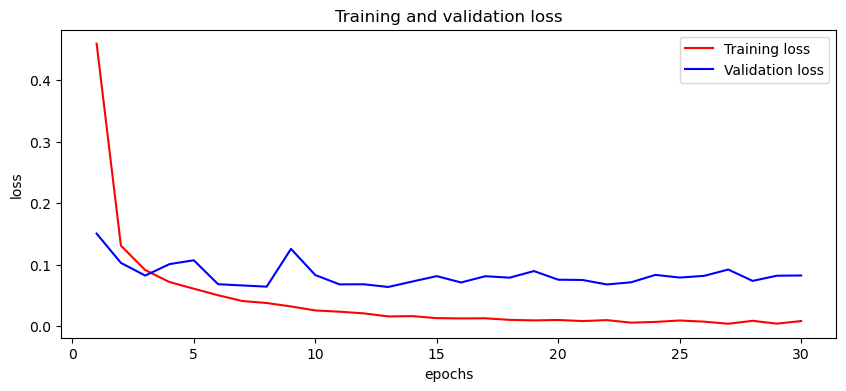

In [58]:
# Plotting the training loss and validation loss
loss4 = history_cnn_model.history["loss"]
validation_loss3 = history_cnn_model.history["val_loss"]
plt.figure()
plt.plot(epochs3, loss4, "r", label="Training loss")
plt.plot(epochs3, validation_loss3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

<h4 style='color:green'> Seems we are getting accuracy of 99% so,Model is overfitting .</h4>

**In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).**

**The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.**

**Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.**

**To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).**


In [59]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

### Data Agumentation 

**In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.****

**For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...**

**Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.**

**By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

**The improvement is important :**

**Without data augmentation i obtained an accuracy of 98.114%.**

**With data augmentation i achieved 99.67% of accuracy**

In [60]:
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train3r)

#### For the data augmentation, i choosed to :

- Randomly rotate some training images by 10 degrees
- Randomly Zoom by 10% some training images
- Randomly shift images horizontally by 10% of the width
- Randomly shift images vertically by 10% of the height
- I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

In [61]:
# Fit the model
history_datagen = cnn_model.fit_generator(datagen.flow(x_train3r,y_train, batch_size=86),
                              epochs = 1, validation_data = (x_test3r,y_test),
                              verbose = 2, steps_per_epoch=x_train3r.shape[0] 
                              , callbacks=[learning_rate_reduction])

60000/60000 - 37s - loss: 0.1725 - accuracy: 0.9491 - val_loss: 0.0499 - val_accuracy: 0.9851 - lr: 0.0010 - 37s/epoch - 615us/step


In [62]:
# Model Evaluation
test_loss,test_acc4=cnn_model.evaluate(x_test3r,y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0499 - accuracy: 0.9851
Test loss: 0.04994416609406471
Test accuracy: 0.9811000227928162


In [63]:
y_pred = cnn_model.predict(x_test3r)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[7.8994863e-06, 2.9204515e-05, 7.2169452e-05, 1.7362626e-07,
        1.6851159e-07, 1.2509378e-08, 6.1064848e-10, 9.9988902e-01,
        1.2411722e-06, 1.6733229e-07],
       [4.3162963e-06, 2.1302269e-06, 9.9825841e-01, 7.2816591e-05,
        3.0780234e-06, 1.5193882e-09, 1.7629590e-08, 1.6564709e-03,
        2.3858297e-06, 3.3374192e-07],
       [7.9753308e-06, 9.9992871e-01, 3.9070198e-08, 1.6231185e-08,
        3.8402127e-06, 3.2166417e-06, 1.6012853e-05, 1.2122427e-05,
        2.6536083e-05, 1.4388058e-06],
       [9.9637979e-01, 2.3122717e-09, 4.7556650e-06, 1.5361909e-06,
        1.7191746e-04, 1.6539093e-07, 2.3039329e-04, 7.4375755e-08,
        5.5511700e-05, 3.1558268e-03],
       [6.1918595e-09, 3.0860650e-09, 5.7507845e-07, 1.7115057e-09,
        9.9999785e-01, 2.5055781e-08, 8.6316454e-08, 1.2122317e-07,
        1.1882981e-06, 1.3097777e-07]], dtype=float32)

In [64]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:27]

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7]

In [65]:
# Classification report
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

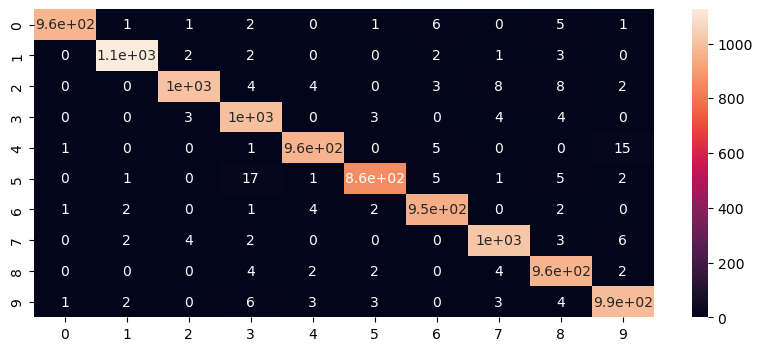

In [66]:
# Displaying Confusion Matrix using HeatMap
cf_matrix2 = confusion_matrix(y_test,y_classes)
sns.heatmap(cf_matrix, annot=True)

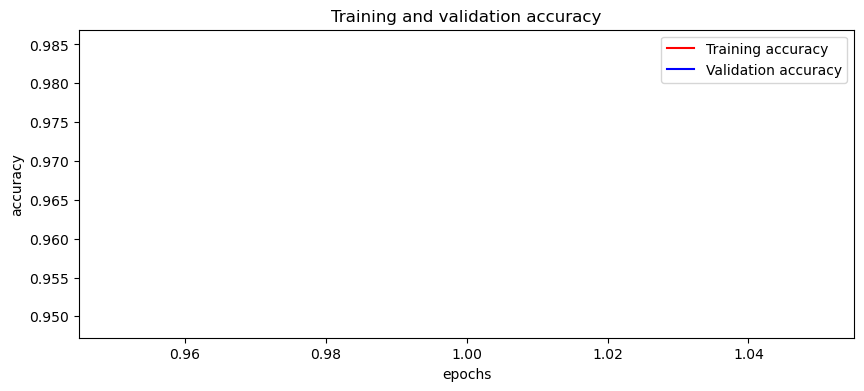

In [67]:
# Plotting the training accuracy and validation accuracy
accuracy3 = history_datagen.history["accuracy"]
validation_accuracy3 = history_datagen.history["val_accuracy"]
loss3 = history_datagen.history["loss"]
epochs3 = range(1, len(loss3) + 1)
plt.plot(epochs3, accuracy3, "r", label="Training accuracy")
plt.plot(epochs3, validation_accuracy3, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

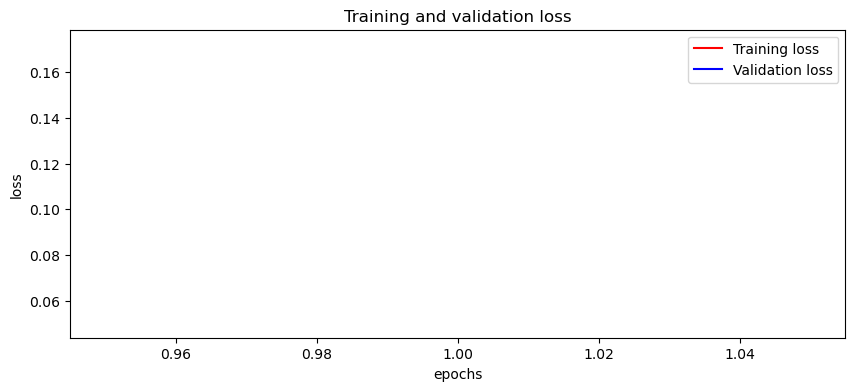

In [68]:
# Plotting the training loss and validation loss
loss4 = history_datagen.history["loss"]
validation_loss3 = history_datagen.history["val_loss"]
plt.figure()
plt.plot(epochs3, loss4, "r", label="Training loss")
plt.plot(epochs3, validation_loss3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### <span style="color:green">Overall Observation of CNN model after applying Data Augmentation :</span>


- The model reaches almost 99% (98.7+%) accuracy on the validation dataset after 2 epochs. The validation accuracy is greater than the training accuracy almost evry time during the training. That means that our model dosen't not overfit the training set.

- Our model is very well trained !!!



### To Apply other classification model we need to normalize the data ..


In [69]:
# reshaping the image
X = x_train.reshape(x_train.shape[0], -1)
Y=y_train

In [70]:
#printing the X value
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [71]:
# fetching the shape of X
print(X.shape)

(60000, 784)


In [72]:
# fetching the shape of Y
print(Y.shape)

(60000,)


In [73]:
# fetching the dimension of X
print(X.ndim)

2


In [74]:
# fetching the dimension of Y
print(Y.ndim)

1


In [75]:
#setting up training and testing data
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2 , random_state= 42 )

## <p style="text-align:center"> 3.  Support Vector Model </p>

### Creating model architecture for SVM Model

In [76]:
# Support Vector Model
SVM = SVC() # with guassian kernal

# specifying starting learning time with the help of datatime.now()
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

#fitting the SVM Model
SVM.fit(X_train, y_train)

# specifying ending learning time with the help of datatime.now()
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))

#Calculating total elapsed time
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2022-12-27 15:50:48.823948
Stop learning 2022-12-27 15:53:04.913882
Elapsed learning 0:02:16.089934


### Printing Train and Test Score

In [77]:
# Printing Train Score
SVM_train=SVM.score(X_train,y_train)
print("Training Score : ",SVM_train)

#Printing Test Score
SVM_test_score=SVM.score(X_test,y_test)
print("Test Score :",SVM_test_score)

Training Score :  0.9895833333333334
Test Score : 0.9775833333333334


### Making Prediction

In [78]:
# Making prediction for SVM model 
SVM_pred=SVM.predict(X_test)

### Classification Report

In [79]:
# Printing Classification Report
print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,SVM_pred)) #recall,precision,f1 scores and accuracy

Classification Report  :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



### Confusion Matrix

<AxesSubplot:>

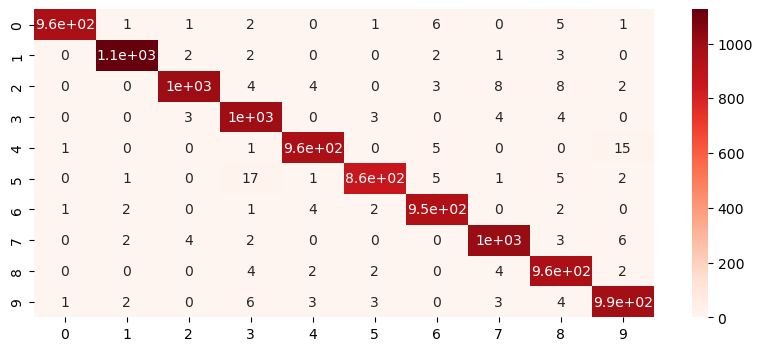

In [80]:
# Printing Confusion Matrix
# Displaying Confusion Matrix using HeatMap
cf_matrix4 = confusion_matrix(y_test,SVM_pred)
sns.heatmap(cf_matrix, annot=True,cmap= 'Reds')

<h4 style=color:green>OverAll Score of Support Vector Machine Model is 98 % accuracy</h4>

## <p style="text-align:center"> 4.  Random Forest Classifier </p>

### Creating model architecture for Random Forest Classifier

In [81]:
# creating object of RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)

# specifying starting learning time with the help of datatime.now()
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

#fitting the RFC Model
RFC.fit(X_train,y_train)

# specifying ending learning time with the help of datatime.now()
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))

#Calculating total elapsed time
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2022-12-27 16:00:30.486942
Stop learning 2022-12-27 16:00:52.682185
Elapsed learning 0:00:22.195243


### Printing Train and Test Score

In [82]:
# Printing Train Score
RFC_train=RFC.score(X_train,y_train)
print("Training Score : ",RFC_train)

#Printinf Test Score
RFC_test_score=RFC.score(X_test,y_test)
print("Test Score :",RFC_test_score)

Training Score :  1.0
Test Score : 0.9670833333333333


### Making Prediction

In [83]:
# Making prediction for RFC model 
RFC_pred=RFC.predict(X_test)

### Classification Report

In [84]:
# printing Classification report
print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,RFC_pred)) #recall,precision,f1 scores and accuracy

Classification Report  :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.98      0.98      0.98      1322
           2       0.95      0.97      0.96      1174
           3       0.97      0.95      0.96      1219
           4       0.96      0.97      0.96      1176
           5       0.97      0.96      0.96      1104
           6       0.98      0.98      0.98      1177
           7       0.97      0.96      0.97      1299
           8       0.96      0.96      0.96      1160
           9       0.95      0.94      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



### Confusion Matrix

<AxesSubplot:>

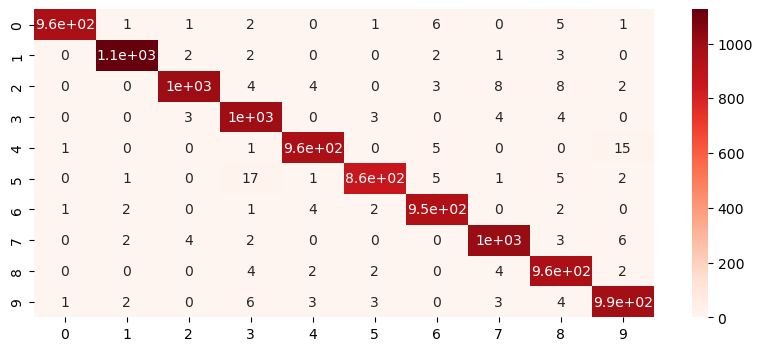

In [85]:
# Printing Confusion Matrix
# Displaying Confusion Matrix using HeatMap
cf_matrix4 = confusion_matrix(y_test,RFC_pred)
sns.heatmap(cf_matrix, annot=True,cmap= 'Reds')

<h4 style=color:green>OverAll Score of Random forest Classifier Model is 97 % accuracy</h4>

## <p style="text-align:center"> 5.  KNeighbour Classifier </p>

### Creating model architecture for KNeighbour Classifier

Text(0, 0.5, 'Error Rate')

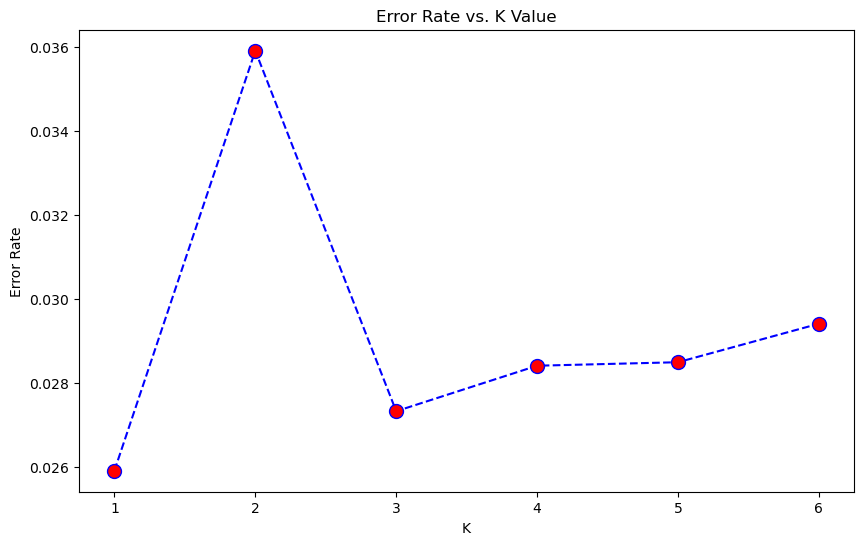

In [86]:
## taking optimal k to determine how many nearest neighbors to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,7),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [87]:
# creating object of KNeighbour Classifier
KN=KNeighborsClassifier(n_neighbors=1)

# specifying starting learning time with the help of datatime.now()
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))

#fitting the KN Model
KN.fit(X_train,y_train)

# specifying ending learning time with the help of datatime.now()
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))

#Calculating total elapsed time
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2022-12-27 16:02:35.727056
Stop learning 2022-12-27 16:02:35.732834
Elapsed learning 0:00:00.005778


### Printing Train and Test Score

In [88]:
# Printing Train Score
KN_train=KN.score(X_train,y_train)
print("Training Score : ",KN_train)

#Printinf Test Score
KN_test_score=KN.score(X_test,y_test)
print("Test Score :",KN_test_score)

Training Score :  1.0
Test Score : 0.9740833333333333


### Making Prediction

In [89]:
# Making prediction for KN model 
KN_pred=KN.predict(X_test)

### Classification Report

In [90]:
# printing Classification report
print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,KN_pred))

Classification Report  :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.97      1.00      0.98      1322
           2       0.98      0.96      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.98      0.99      0.99      1177
           7       0.97      0.97      0.97      1299
           8       0.99      0.95      0.97      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



### Confusion Matrix

<AxesSubplot:>

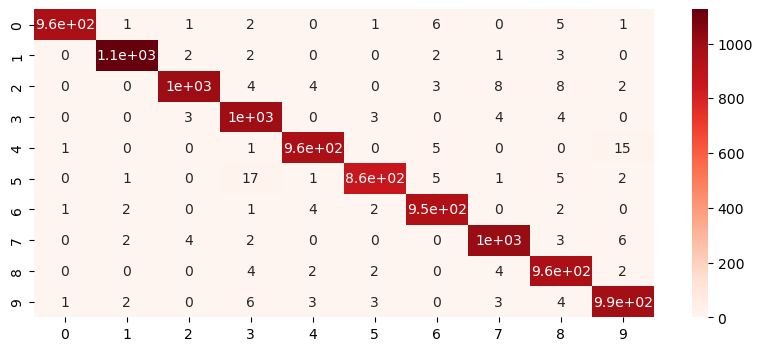

In [91]:
# Displaying Confusion Matrix using HeatMap
cf_matrix4 = confusion_matrix(y_test,KN_pred)
sns.heatmap(cf_matrix, annot=True,cmap= 'Reds')

<h4 style=color:green>OverAll Score of KNeighbour Classifier Model is 97 % accuracy.</h4>

### HyperTunning KNeighbour Classifier With GridSearchCV

In [92]:
# Hyper Tunning the KNeighbour Classifier with GirdSearchCV

grid_params = { 'n_neighbors' : [1],
               'weights' : ['uniform'],
               'metric' : ['minkowski']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, n_jobs =1)

start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
g_res = gs.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2022-12-27 16:04:05.807264
Stop learning 2022-12-27 16:04:51.131017
Elapsed learning 0:00:45.323753


In [93]:
# Fetching best paramater of KNeighbours Classification
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

In [94]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [95]:
# Printing Training and Testing Score of KNeighBour Classification
knn_test_score=metrics.accuracy_score(y_test, y_knn)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',knn_test_score)

Training set accuracy:  0.97775
Test set accuracy:  0.9705833333333334


In [96]:
# Printing Classification Report
print('\033[1m' + 'Classification Report  :' + '\033[0m' + '\n',classification_report(y_test,y_knn))

Classification Report  :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.94      1.00      0.97      1322
           2       0.98      0.96      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.96      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.97      0.97      1299
           8       0.99      0.93      0.96      1160
           9       0.97      0.95      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



<AxesSubplot:>

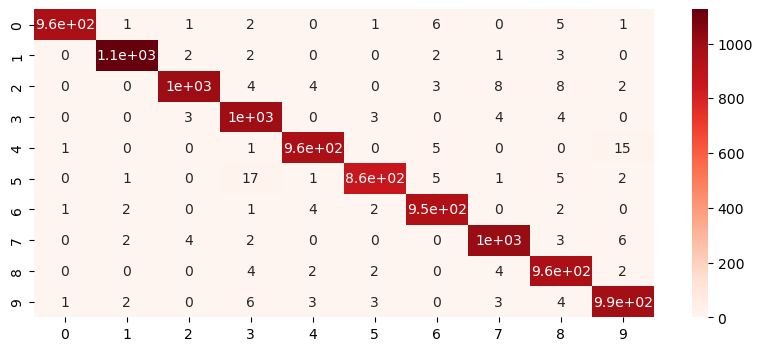

In [97]:
# Printing Confusion Matrix
# Displaying Confusion Matrix using HeatMap
cf_matrix4 = confusion_matrix(y_test,y_knn)
sns.heatmap(cf_matrix, annot=True,cmap= 'Reds')

<h4 style=color:green>OverAll Score of KNeighbour Classifier model after hypertunning is 97% only.</h4>

### Performance Report of best Model (CNN Model With DataAugmentation )

<h3 style=color:green> loss: 0.1725 - accuracy: 0.9491 - val_loss: 0.0499 - val_accuracy: 0.9851 - lr: 0.0010 </h3>

## Visualizing some prediction


In [98]:
# get predictions on the test set
y_hat1=cnn_model.predict(x_test3r)

# define text labels 
digit_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

313/313 [==============================] - 2s 8ms/step


In [99]:
# printing the prediction value
print(y_hat1)

[[7.8994863e-06 2.9204515e-05 7.2169452e-05 ... 9.9988902e-01
  1.2411722e-06 1.6733229e-07]
 [4.3162963e-06 2.1302269e-06 9.9825841e-01 ... 1.6564709e-03
  2.3858297e-06 3.3374192e-07]
 [7.9753308e-06 9.9992871e-01 3.9070198e-08 ... 1.2122427e-05
  2.6536083e-05 1.4388058e-06]
 ...
 [1.1973055e-09 6.9972948e-08 1.6983859e-07 ... 3.3215761e-07
  2.8151648e-05 3.5503810e-08]
 [4.4899173e-07 1.7192787e-07 1.3331348e-07 ... 2.4299858e-09
  5.8251324e-05 4.1197932e-06]
 [1.4604320e-04 1.4888471e-06 6.3370062e-06 ... 4.5201158e-08
  1.1811428e-06 1.7161483e-06]]


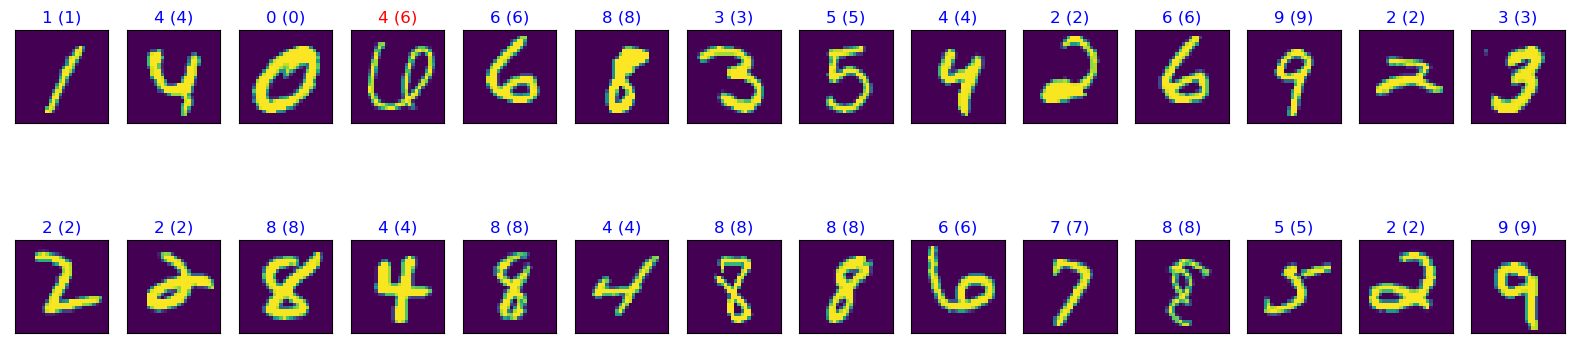

In [100]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 5))
for i, idx in enumerate(np.random.choice(x_test2_reduced.shape[0], size=28, replace=False)):
    ax = fig.add_subplot(2, 14, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat1[idx])
    true_idx = np.argmax(y_test2[idx])
    ax.set_title("{} ({})".format(digit_labels[pred_idx], digit_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

####  <span style="color:red"> Here are some of the key outcomes of the project:

- The Given dataset is Image which is very small dataset of 28 images which contains a number between 0-9.
- Equally images is not distributed between 0 to 9
- Random images dataset are available.
- All images is segerated in different different classes from 0 to 9.
- checked Data Imbalance, as dataset is small so no need to balance the image of dataset.
- As it is image classficcation problem applied , Neural Network ads well as other classification model to get better accuracy.
- With MLP Model tried with PCA also and With CNN data Agumenation is also applied. 
- Goes with other model SVM, Random Forest, KNeighbour and Kneighbour hypertunne also.
- Got 99% almost accuracy with CNN_model with dataaugmentation performthe best on current dataset.
    

####  <span style="color:red"> Challenges that I faced in this project: </span>

- To figure out, Business case belongs to which type of problem it is as classfication Deep Nerual Network , as image is there.
- As data was small, to do apply which model is very diificult to understand.
- Figuring out what assumptions can be safely made about the data and the underlying system.
- Choosing best model for this project.